<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

**Naive Bayes**

Naive Bayes is a probabilistic classifier based on Bayes' theorem, which assumes that the features are conditionally independent given the class label. Despite this "naive" assumption, it often performs well in text classification and spam detection tasks

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


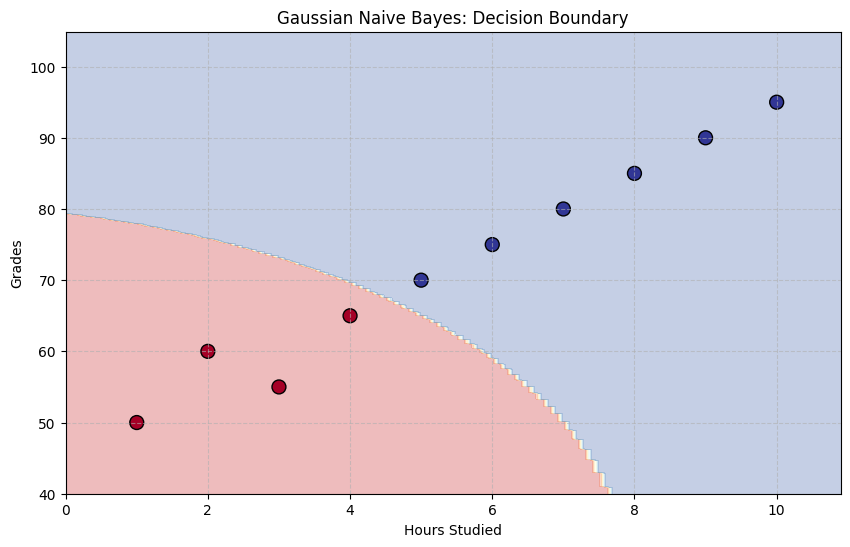

In [2]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Sample data (e.g., hours studied and grades vs. pass/fail)
X = np.array([[1, 50], [2, 60], [3, 55], [4, 65], [5, 70], [6, 75], [7, 80], [8, 85], [9, 90], [10, 95]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # 0 = fail, 1 = pass

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

import matplotlib.pyplot as plt

# Create a mesh grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 10, X[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3) # Decision regions
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=100) # Data points

plt.title('Gaussian Naive Bayes: Decision Boundary')
plt.xlabel('Hours Studied')
plt.ylabel('Grades')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()